In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../../")

%matplotlib notebook
import matplotlib.pylab as plt

In [2]:
import ld_gan
import numpy as np
import torch
import ld_gan.utils.utils as ld
import scipy.misc
from tqdm import tqdm

# show learning curve 

In [3]:
acc = np.loadtxt("eval_imgs//clf_model/acc.txt", skiprows=1)

<IPython.core.display.Javascript object>


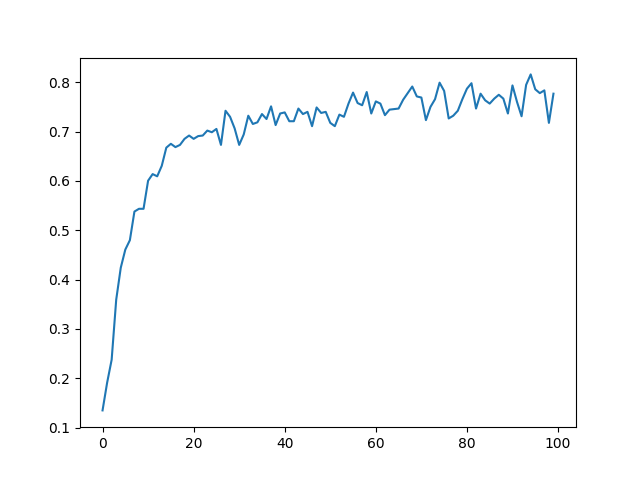

In [4]:
plt.plot(acc[:100])

In [5]:
print "acc = ", np.mean(acc[450:550]), "+/-", np.std(acc[450:550])

acc =  0.828504464286 +/- 0.0184541794798


# load model

In [6]:
fname = "eval_imgs/clf_model/cnn_64_150.pth"
clf = torch.load(fname)
clf.cuda()
clf = clf.eval()

# load data

In [7]:
x, y = [], []
fnames = ld.listdir("eval_imgs/xf_111v1_split.py_TEST//")
for fname in fnames:
    c = int(fname.split("_")[-1].split(".")[0])
    if c != -1:
        x.append(scipy.misc.imread(fname))
        y.append(c)
        
    if len(x) >= 1020:
        break
x = np.array(x)
y = np.array(y)

In [8]:
Xt, Yt = ld_gan.data_proc.data_loader.load_data(11, resize=64)
Yt = np.argmax(Yt, axis=1)

100%|██████████| 102/102 [00:02<00:00, 41.71it/s]

load data from '/export/home/oblum/projects/ld_gan/data/flowers_102/jpg_test_256'


In [9]:
Xt = [scipy.misc.imresize(img, (299, 299)) for img in Xt]

In [10]:
x = [scipy.misc.imresize(img, (299, 299)) for img in x]

# get accuracy

In [11]:
yt_pred = ld_gan.utils.model_handler.apply_model(clf, Xt, batch_size=32)
yt_pred = np.argmax(yt_pred, axis=1)

In [12]:
y_pred = ld_gan.utils.model_handler.apply_model(clf, x, batch_size=32)
y_pred = np.argmax(y_pred, axis=1)

In [17]:
for it in np.arange(10, 300, 10):
    
    print "\n"
    print it
    print "========================"
    
    fname = "eval_imgs/clf_model/cnn_64_"+str(it).zfill(3)+".pth"
    clf = torch.load(fname)
    clf.cuda()
    clf = clf.eval()

    y_pred = ld_gan.utils.model_handler.apply_model(clf, x, batch_size=32)
    y_pred = np.argmax(y_pred, axis=1)

    yt_pred = ld_gan.utils.model_handler.apply_model(clf, Xt, batch_size=32)
    yt_pred = np.argmax(yt_pred, axis=1)
    
    print "accuracy real:", (yt_pred == Yt).sum() / float(len(Yt))
    print "accuracy fake:", (y_pred == y).sum() / float(len(y))

    print "========================"



10
accuracy real: 0.600980392157
accuracy fake: 0.139896373057


20
accuracy real: 0.682352941176
accuracy fake: 0.139896373057


30
accuracy real: 0.656862745098
accuracy fake: 0.132124352332


40
accuracy real: 0.710784313725
accuracy fake: 0.155440414508


50
accuracy real: 0.711764705882
accuracy fake: 0.129533678756


60
accuracy real: 0.746078431373
accuracy fake: 0.132124352332


70
accuracy real: 0.747058823529
accuracy fake: 0.158031088083


80
accuracy real: 0.756862745098
accuracy fake: 0.137305699482


90
accuracy real: 0.754901960784
accuracy fake: 0.126943005181


100
accuracy real: 0.763725490196
accuracy fake: 0.163212435233


110
accuracy real: 0.766666666667
accuracy fake: 0.165803108808


120
accuracy real: 0.766666666667
accuracy fake: 0.152849740933


130
accuracy real: 0.769607843137
accuracy fake: 0.173575129534


140
accuracy real: 0.794117647059
accuracy fake: 0.155440414508


150
accuracy real: 0.775490196078
accuracy fake: 0.160621761658


160
accuracy real

<IPython.core.display.Javascript object>


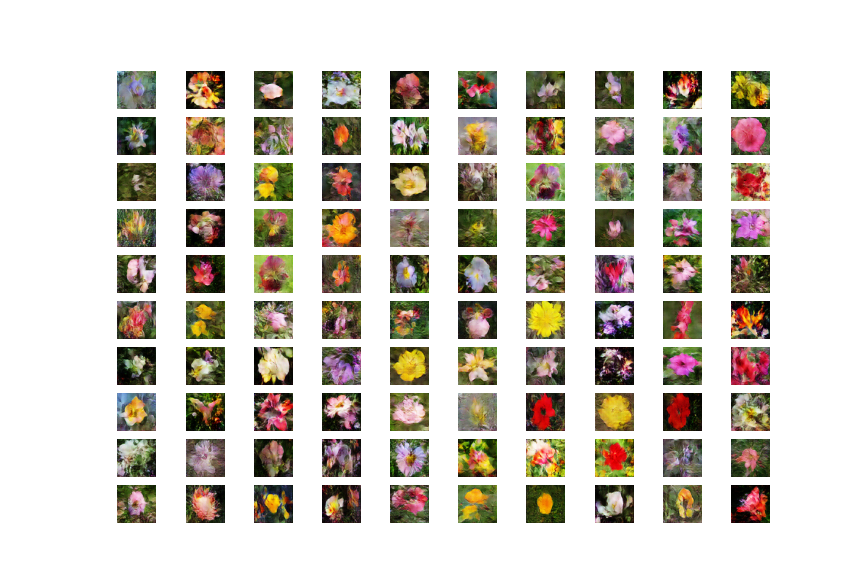

In [19]:
ld_gan.visualize.disp_array(x[:100], (10,10))